## Solving Laplace Equation using Finite Differences
Implementing Jacobi and Gauss-Seidel Method. Better ones definitely exist! https://surface.syr.edu/cgi/viewcontent.cgi?article=1160&context=eecs_techreports

In [2]:
import numpy as np 
from numerical_utils import gauss_seidel, initialize_solution
from matplotlib import pyplot as plt  
import time 

# Use Gauss seidel w/ large grid size and n_iters to get a good ground truth accuracy
n = 100
n_iters = 5000
boundaries = [0, 0, 100, 0] # [top, bottom, left, right]
solution = initialize_solution(n, boundaries)

# Run Gauss Seidel
tic = time.time()
solution = gauss_seidel(solution, n_iters)
toc = time.time()

print(f"Gauss Seidel took {toc - tic} seconds to run {n_iters} iterations")
ground_truth = np.copy(solution)

Gauss Seidel took 18.29215908050537 seconds to run 5000 iterations


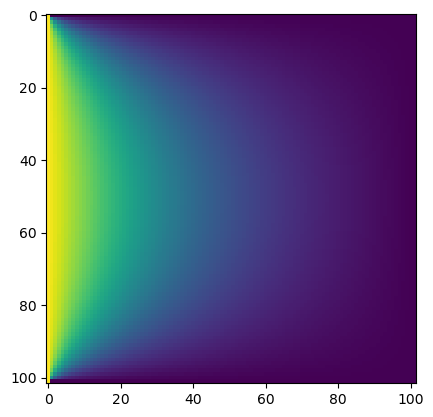

In [3]:
plt.imshow(solution)

In [5]:
from numerical_utils import jacobi, relative_l2_loss
# Experiment with runtimes and accuracies

# Jacobi
iterations = [100, 200, 400, 800, 1600, 3200]
jacobi_runtimes = []
jacobi_accuracies = []

for n_iters in iterations:
    solution = initialize_solution(n, boundaries)
    tic = time.time()
    solution = jacobi(solution, n_iters)
    toc = time.time()
    jacobi_runtimes.append(toc - tic)
    jacobi_accuracies.append(relative_l2_loss(solution, ground_truth))
    print(f"Jacobi took {toc - tic} seconds to run {n_iters} iterations with relative L2 loss {jacobi_accuracies[-1]}")

Jacobi took 0.38142967224121094 seconds to run 100 iterations with relative L2 loss 0.4689865228740146
Jacobi took 0.7303707599639893 seconds to run 200 iterations with relative L2 loss 0.38668201465429164
Jacobi took 1.5013551712036133 seconds to run 400 iterations with relative L2 loss 0.28473141553630177
Jacobi took 2.9074418544769287 seconds to run 800 iterations with relative L2 loss 0.16848626574206357
Jacobi took 5.777623414993286 seconds to run 1600 iterations with relative L2 loss 0.06303004300340792
Jacobi took 11.540839672088623 seconds to run 3200 iterations with relative L2 loss 0.009075531690407345


In [6]:
# Gauss Seidel

gauss_seidel_runtimes = []
gauss_seidel_accuracies = []

for n_iters in iterations:
    solution = initialize_solution(n, boundaries)
    tic = time.time()
    solution = gauss_seidel(solution, n_iters)
    toc = time.time()
    gauss_seidel_runtimes.append(toc - tic)
    gauss_seidel_accuracies.append(relative_l2_loss(solution, ground_truth))
    print(f"Gauss Seidel took {toc - tic} seconds to run {n_iters} iterations with relative L2 loss {gauss_seidel_accuracies[-1]}")

Gauss Seidel took 0.3876833915710449 seconds to run 100 iterations with relative L2 loss 0.38201495536457614
Gauss Seidel took 0.747638463973999 seconds to run 200 iterations with relative L2 loss 0.28103539767446595
Gauss Seidel took 1.4448926448822021 seconds to run 400 iterations with relative L2 loss 0.1660826216747839
Gauss Seidel took 2.858672857284546 seconds to run 800 iterations with relative L2 loss 0.06210993886738912
Gauss Seidel took 5.847434043884277 seconds to run 1600 iterations with relative L2 loss 0.009225532404629309
Gauss Seidel took 11.612911224365234 seconds to run 3200 iterations with relative L2 loss 0.0005146916241590046


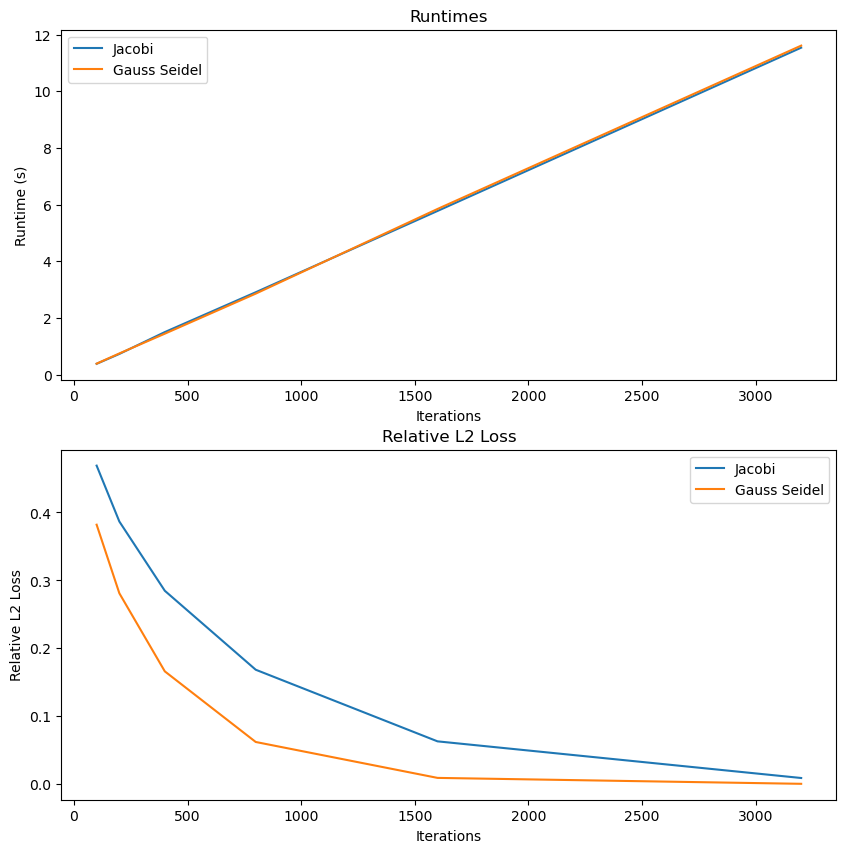

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(iterations, jacobi_runtimes, label="Jacobi")
axs[0].plot(iterations, gauss_seidel_runtimes, label="Gauss Seidel")
axs[0].set_title("Runtimes")
axs[0].set_xlabel("Iterations")
axs[0].set_ylabel("Runtime (s)")
axs[0].legend()

axs[1].plot(iterations, jacobi_accuracies, label="Jacobi")
axs[1].plot(iterations, gauss_seidel_accuracies, label="Gauss Seidel")
axs[1].set_title("Relative L2 Loss")
axs[1].set_xlabel("Iterations")
axs[1].set_ylabel("Relative L2 Loss")
axs[1].legend()